#Import and Setup 

In [48]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Display options
pd.set_option('display.max_columns', None)

In [49]:

# Define the keyword data from all three banks 
bank_data = {
    'Bank of Abyssinia': {
        'keywords': {'app': 356, 'not': 172, 'work': 129, 'bank': 82, 'update': 74, 
                    'mobile': 65, 'bad': 62, 'banking': 62, 'time': 60, 'use': 59},
        'bigrams': {'mobile banking': 42, 'developer option': 29, 'banking app': 28, 
                   'bad app': 19, 'good app': 13, 'work properly': 11, 'bad mobile': 11, 
                   'previous version': 10, 'keep crash': 9}
    },
    'Commercial Bank of Ethiopia': {
        'keywords': {'app': 372, 'not': 194, 'transaction': 139, 'transfer': 112, 
                    'work': 107, 'update': 105, 'bank': 98, 'time': 97, 'use': 90, 'good': 89},
        'bigrams': {'good app': 25, 'mobile banking': 22, 'developer option': 21, 
                   'transfer money': 19, 'transaction history': 18, 'banking app': 16, 
                   'recent transaction': 14, 'error message': 13, 'send money': 11, 'developer mode': 10}
    },
    'Dashen Bank': {
        'keywords': {'app': 221, 'dashen': 102, 'good': 92, 'bank': 78, 'super': 74, 
                    'banking': 71, 'fast': 46, 'feature': 46, 'easy': 44, 'use': 42},
        'bigrams': {'dashen bank': 57, 'super app': 46, 'dashen super': 22, 'good app': 21, 
                   'mobile banking': 19, 'step ahead': 19, 'bank super': 18, 'banking app': 15, 
                   'digital banking': 12, 'supper app': 11}
    }
}

# Categorize keywords into positive and negative
positive_keywords = {}
negative_keywords = {}

# Define positive and negative terms
positive_terms = [
    'good', 'super', 'fast', 'feature', 'easy', 'banking', 'digital', 
    'good app', 'super app', 'mobile banking', 'transfer money', 'send money', 
    'transaction history', 'digital banking', 'step ahead', 'dashen super',
    'bank super', 'recent transaction'
]

negative_terms = [
    'not', 'bad', 'crash', 'error', 'problem', 'bad app', 'bad mobile',
    'keep crash', 'error message', 'developer option', 'developer mode',
    'work properly', 'previous version'
]

# Aggregate all keywords and bigrams from all banks
all_keywords = {}
all_bigrams = {}

for bank, data in bank_data.items():
    for word, freq in data['keywords'].items():
        all_keywords[word] = all_keywords.get(word, 0) + freq
    for phrase, freq in data['bigrams'].items():
        all_bigrams[phrase] = all_bigrams.get(phrase, 0) + freq

# Combine keywords and bigrams
all_terms = {**all_keywords, **all_bigrams}

# Categorize terms
for term, freq in all_terms.items():
    if any(pos_term in term.lower() for pos_term in positive_terms):
        positive_keywords[term] = freq
    elif any(neg_term in term.lower() for neg_term in negative_terms):
        negative_keywords[term] = freq

print("Positive Keywords Found:", len(positive_keywords))
print("Negative Keywords Found:", len(negative_keywords))

Positive Keywords Found: 18
Negative Keywords Found: 10


#Sentiment Distribution

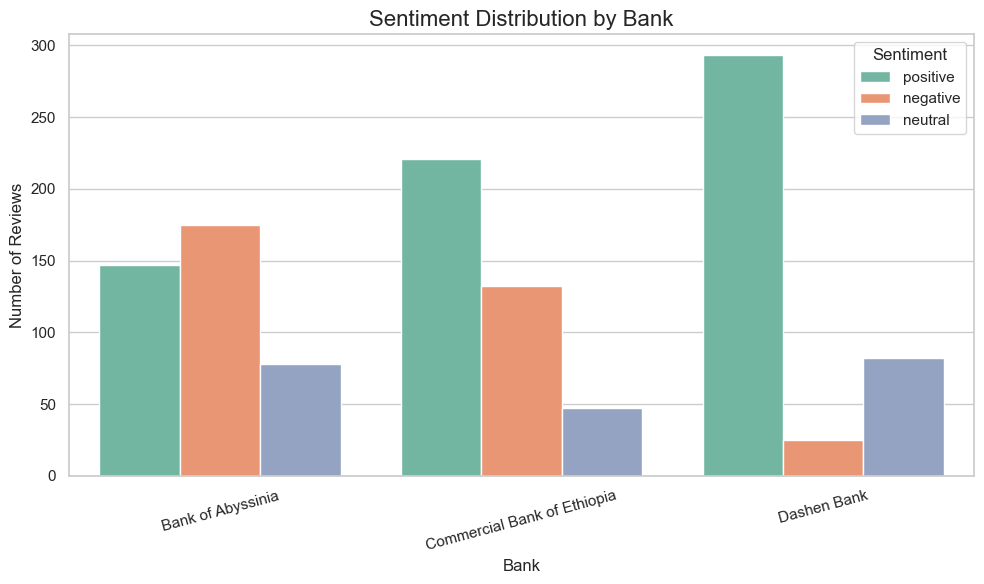

In [ ]:
sns.set(style="whitegrid")
sns.countplot(data=df, x='bank', hue='sentiment_label', palette='Set2')  

plt.title('Sentiment Distribution by Bank', fontsize=16)
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=15)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

#Rating Distribution

In [73]:
bank_colors = {
    'Bank of Abyssinia': '#FFD700',  # yellow
    'Commercial Bank of Ethiopia': '#800080',  # purple
    'Dashen Bank': '#1E90FF',  # blue
}


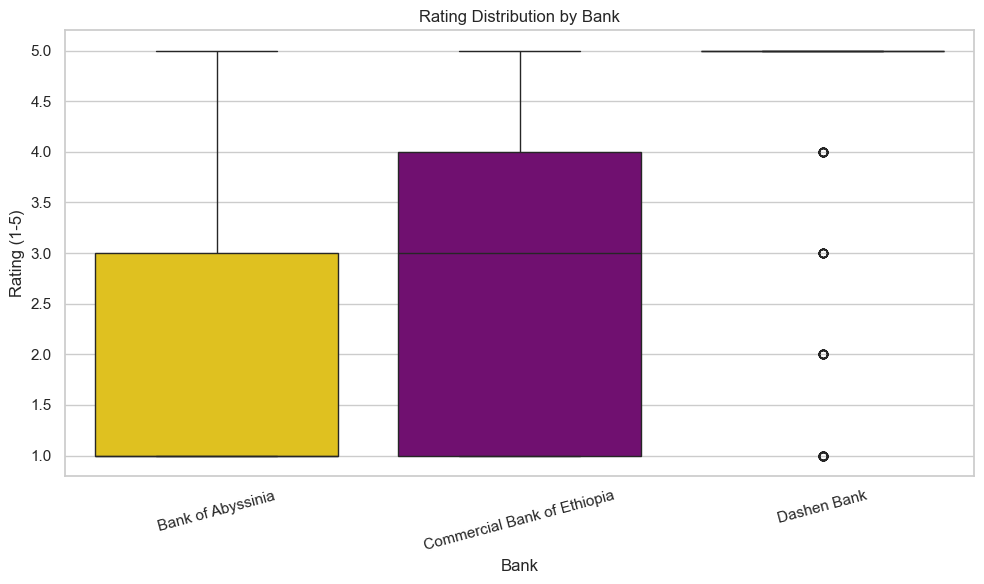

In [72]:
palette = [bank_colors.get(bank, '#333333') for bank in df['bank'].unique()]
sns.boxplot(data=df, x='bank', y='rating', hue='bank', palette=palette, legend=False)
plt.title('Rating Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Rating (1-5)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#Theme Frequency

In [ ]:

# Define themes based on keywords
themes = {
    'App Functionality': {
        'keywords': ['app', 'work', 'use', 'feature', 'update'],
        'bigrams': ['banking app', 'good app', 'bad app', 'super app', 'work properly', 'previous version']
    },
    'Mobile Banking Services': {
        'keywords': ['mobile', 'banking', 'transaction', 'transfer'],
        'bigrams': ['mobile banking', 'transfer money', 'send money', 'transaction history', 'recent transaction', 'digital banking']
    },
    'User Experience': {
        'keywords': ['good', 'bad', 'fast', 'easy', 'super', 'time'],
        'bigrams': ['step ahead', 'dashen super', 'bank super', 'bad mobile', 'keep crash']
    },
    'Technical Issues': {
        'keywords': ['not', 'error', 'crash', 'problem'],
        'bigrams': ['developer option', 'error message', 'developer mode', 'keep crash']
    },
    'Bank Identity': {
        'keywords': ['bank', 'dashen'],
        'bigrams': ['dashen bank']
    }
}

In [52]:
# Calculate theme frequencies for each bank
def calculate_theme_frequencies(bank_data, themes):
    theme_frequencies = {}
    
    for bank_name, data in bank_data.items():
        theme_frequencies[bank_name] = {}
        
        for theme_name, theme_terms in themes.items():
            total_freq = 0
            
            # Count keyword frequencies
            for keyword in theme_terms['keywords']:
                if keyword in data['keywords']:
                    total_freq += data['keywords'][keyword]
            
            # Count bigram frequencies
            for bigram in theme_terms['bigrams']:
                if bigram in data['bigrams']:
                    total_freq += data['bigrams'][bigram]
            
            theme_frequencies[bank_name][theme_name] = total_freq
    
    return theme_frequencies

theme_freq = calculate_theme_frequencies(bank_data, themes)

# Display theme frequencies
print("THEME FREQUENCIES BY BANK")
print("=" * 50)
for bank, themes_data in theme_freq.items():
    print(f"\n{bank}:")
    for theme, freq in sorted(themes_data.items(), key=lambda x: x[1], reverse=True):
        print(f"  {theme}: {freq}")


THEME FREQUENCIES BY BANK

Bank of Abyssinia:
  App Functionality: 699
  Technical Issues: 210
  Mobile Banking Services: 169
  User Experience: 142
  Bank Identity: 82

Commercial Bank of Ethiopia:
  App Functionality: 715
  Mobile Banking Services: 335
  Technical Issues: 238
  User Experience: 186
  Bank Identity: 98

Dashen Bank:
  App Functionality: 391
  User Experience: 315
  Bank Identity: 237
  Mobile Banking Services: 102
  Technical Issues: 0


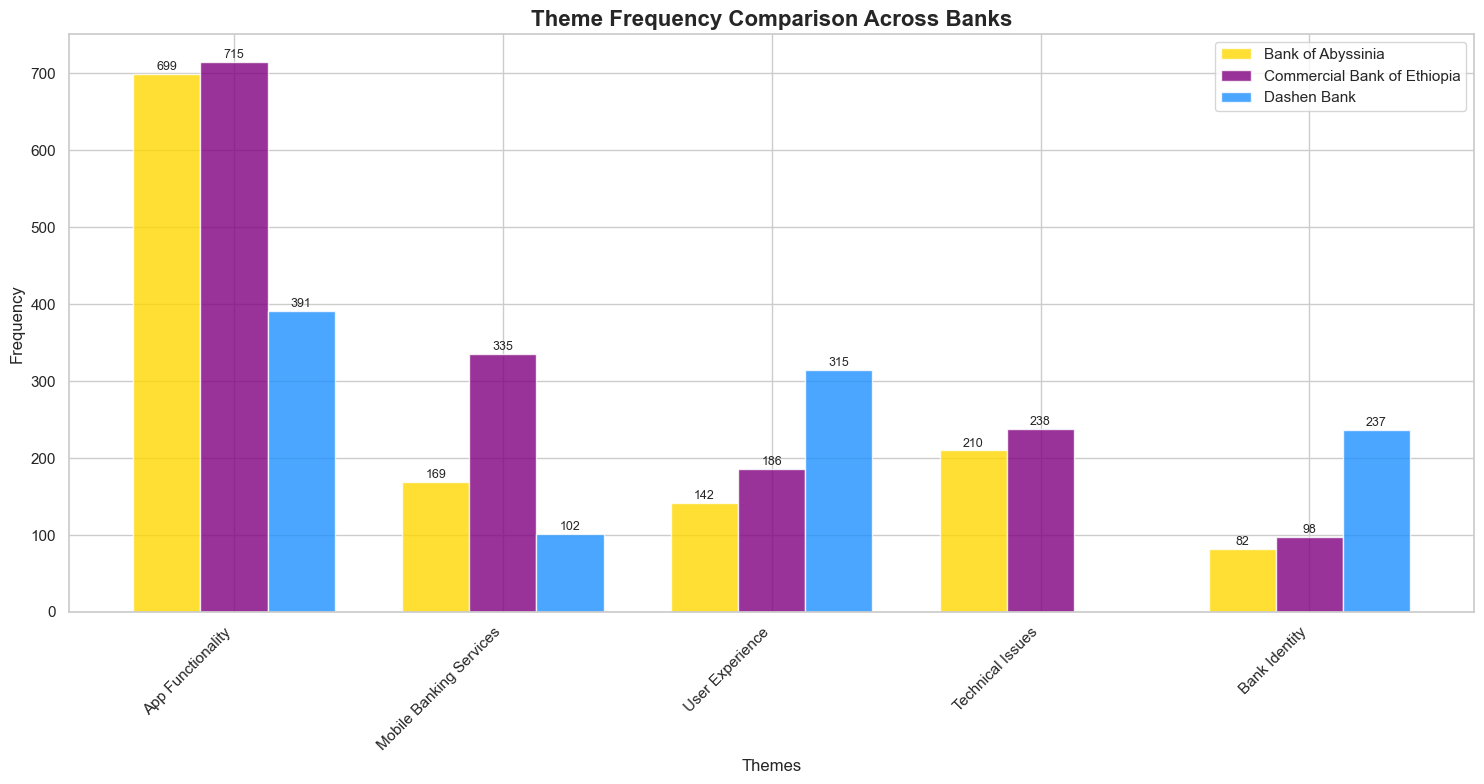

In [ ]:
# Grouped bar chart for theme comparison

bank_colors = {
    'Bank of Abyssinia': '#FFD700',  # yellow
    'Commercial Bank of Ethiopia': '#800080',  # purple
    'Dashen Bank': '#1E90FF',  # blue
}

fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(themes_list))
width = 0.25
multiplier = 0

for i, bank in enumerate(banks):
    offset = width * multiplier
    values = df_themes.loc[bank].values
    color = bank_colors.get(bank, '#333333')  # Use custom color for each bank
    rects = ax.bar(x + offset, values, width, label=bank, alpha=0.8, color=color)
    
    # Add value labels on bars
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width()/2., height + 1,
                   f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    multiplier += 1

ax.set_xlabel('Themes', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Theme Frequency Comparison Across Banks', fontsize=16, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(themes_list, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [47]:
# Calculate and display summary statistics
print("\n" + "=" * 70)
print("THEME FREQUENCY ANALYSIS SUMMARY")
print("=" * 70)

# Overall theme rankings
overall_themes = df_themes.sum(axis=0).sort_values(ascending=False)
print("\nOverall Theme Rankings (All Banks Combined):")
for theme, total_freq in overall_themes.items():
    print(f"  {theme}: {total_freq}")

# Bank rankings by total theme activity
bank_totals = df_themes.sum(axis=1).sort_values(ascending=False)
print(f"\nBank Rankings by Total Theme Activity:")
for bank, total_freq in bank_totals.items():
    print(f"  {bank}: {total_freq}")

# Most dominant theme per bank
print(f"\nMost Dominant Theme per Bank:")
for bank in banks:
    dominant_theme = df_themes.loc[bank].idxmax()
    dominant_freq = df_themes.loc[bank].max()
    print(f"  {bank}: {dominant_theme} ({dominant_freq} mentions)")

# Theme diversity analysis
print(f"\nTheme Diversity Analysis:")
for bank in banks:
    non_zero_themes = (df_themes.loc[bank] > 0).sum()
    total_themes = len(themes_list)
    diversity_ratio = (non_zero_themes / total_themes) * 100
    print(f"  {bank}: {non_zero_themes}/{total_themes} themes active ({diversity_ratio:.1f}%)")

print("\n" + "=" * 70)


THEME FREQUENCY ANALYSIS SUMMARY

Overall Theme Rankings (All Banks Combined):
  App Functionality: 1805
  User Experience: 643
  Mobile Banking Services: 606
  Technical Issues: 448
  Bank Identity: 417

Bank Rankings by Total Theme Activity:
  Commercial Bank of Ethiopia: 1572
  Bank of Abyssinia: 1302
  Dashen Bank: 1045

Most Dominant Theme per Bank:
  Bank of Abyssinia: App Functionality (699 mentions)
  Commercial Bank of Ethiopia: App Functionality (715 mentions)
  Dashen Bank: App Functionality (391 mentions)

Theme Diversity Analysis:
  Bank of Abyssinia: 5/5 themes active (100.0%)
  Commercial Bank of Ethiopia: 5/5 themes active (100.0%)
  Dashen Bank: 4/5 themes active (80.0%)



#Key Word Cloud

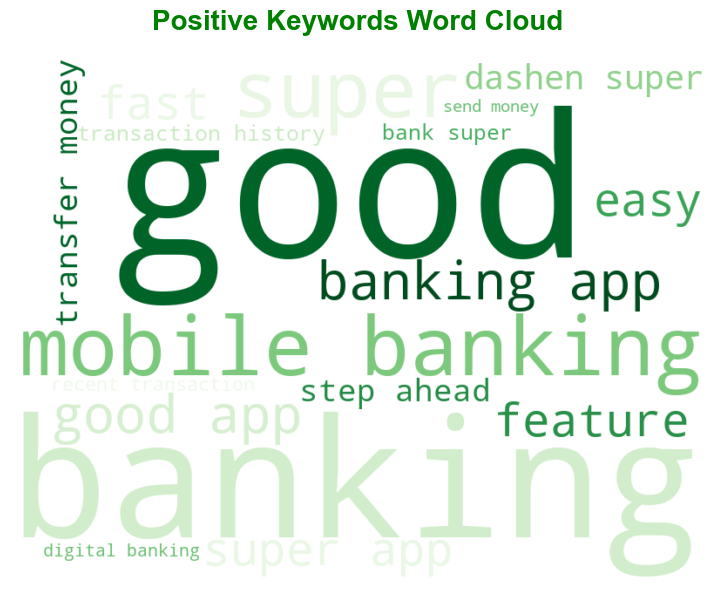

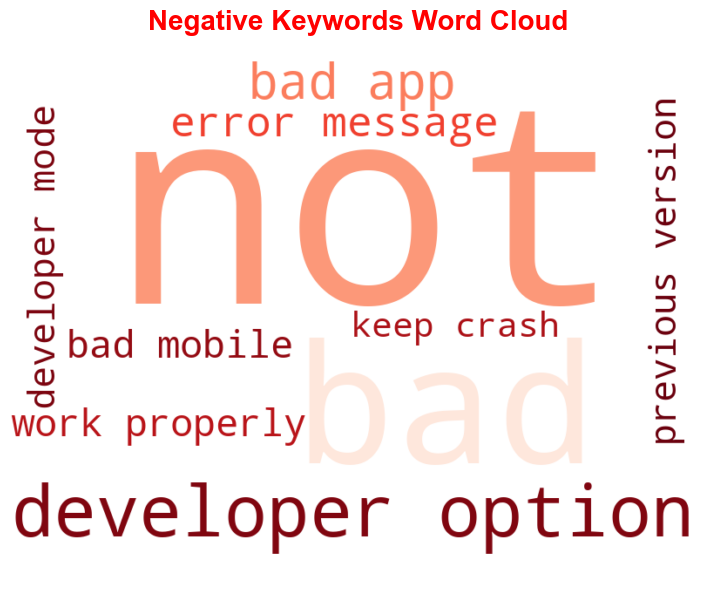

In [ ]:

# --- Positive Word Cloud ---
if positive_keywords:
    wordcloud_positive = WordCloud(
        width=800, 
        height=600, 
        background_color='white',
        colormap='Greens',
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(positive_keywords)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Positive Keywords Word Cloud', fontsize=20, fontweight='bold', color='green', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("positive_wordcloud.png")  # Optional
    plt.show()

# --- Negative Word Cloud ---
if negative_keywords:
    wordcloud_negative = WordCloud(
        width=800, 
        height=600, 
        background_color='white',
        colormap='Reds',
        max_words=50,
        relative_scaling=0.5,
        min_font_size=10
    ).generate_from_frequencies(negative_keywords)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Negative Keywords Word Cloud', fontsize=20, fontweight='bold', color='red', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("negative_wordcloud.png")  # Optional
    plt.show()


#Frequency Bar Chart

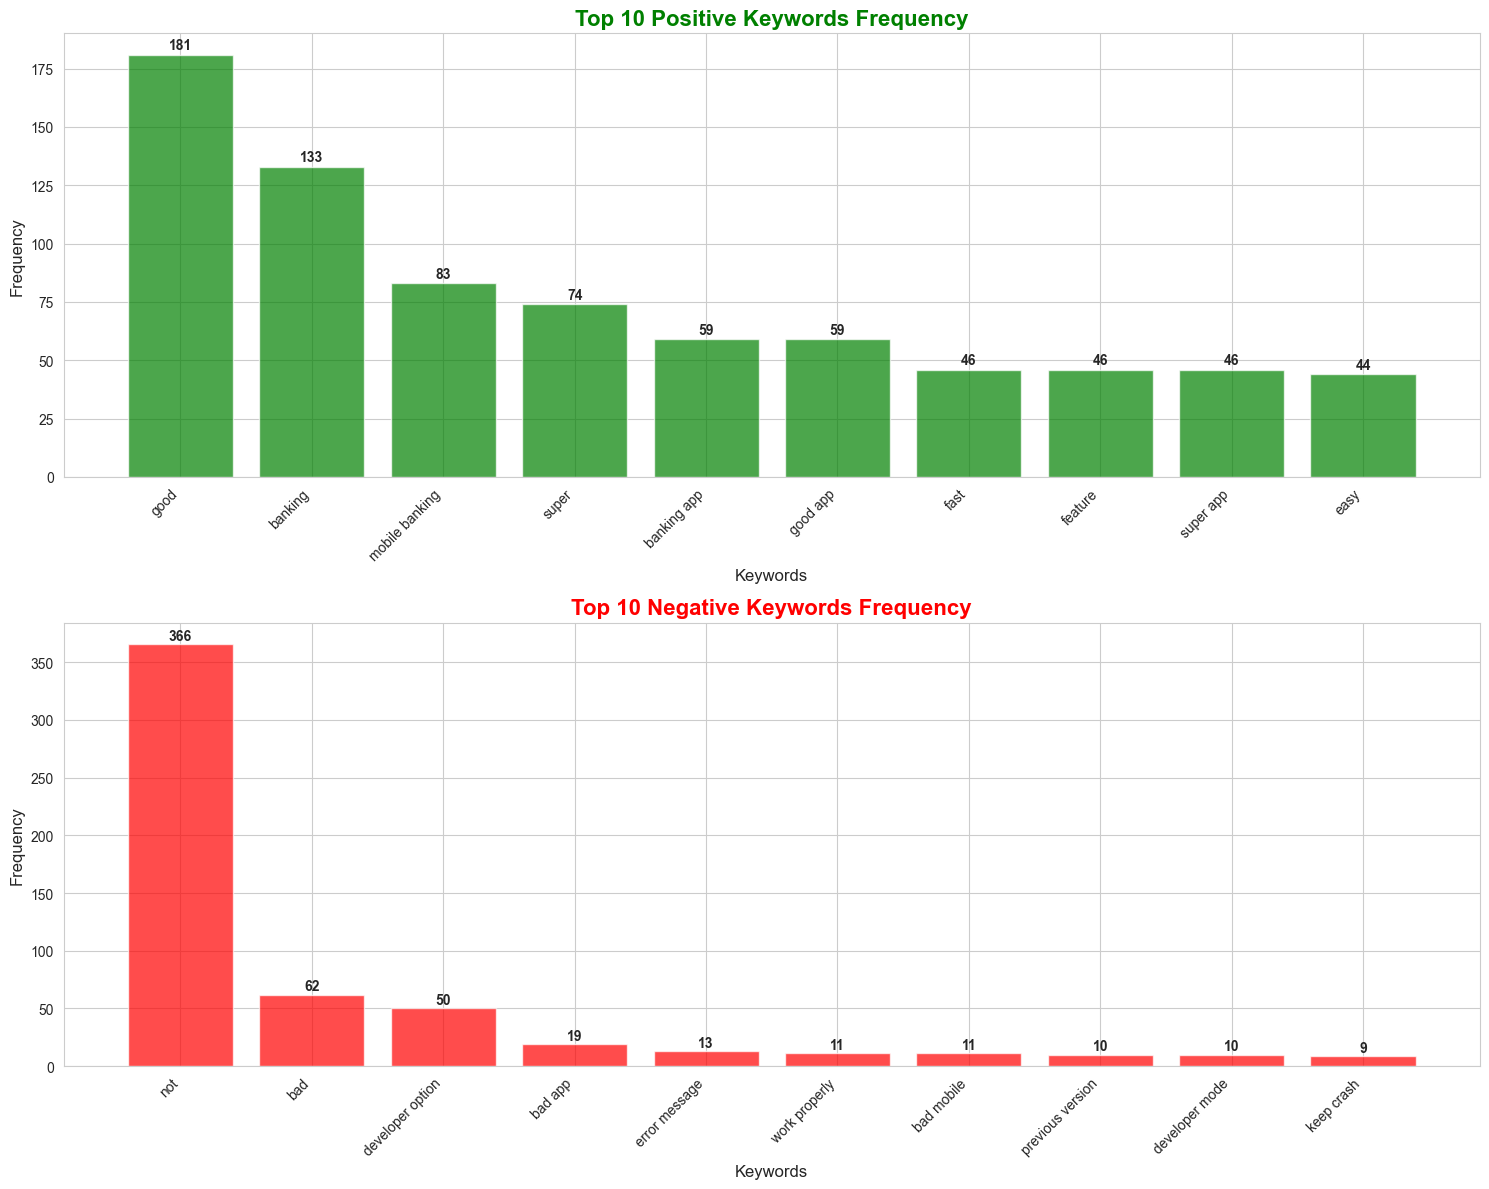

In [ ]:

# Create frequency bar charts for better analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top positive keywords bar chart
if positive_keywords:
    pos_sorted = dict(sorted(positive_keywords.items(), key=lambda x: x[1], reverse=True)[:10])
    bars1 = ax1.bar(range(len(pos_sorted)), list(pos_sorted.values()), color='green', alpha=0.7)
    ax1.set_xlabel('Keywords', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title('Top 10 Positive Keywords Frequency', fontsize=16, fontweight='bold', color='green')
    ax1.set_xticks(range(len(pos_sorted)))
    ax1.set_xticklabels(list(pos_sorted.keys()), rotation=45, ha='right')
    
    # Add value labels on bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Top negative keywords bar chart
if negative_keywords:
    neg_sorted = dict(sorted(negative_keywords.items(), key=lambda x: x[1], reverse=True)[:10])
    bars2 = ax2.bar(range(len(neg_sorted)), list(neg_sorted.values()), color='red', alpha=0.7)
    ax2.set_xlabel('Keywords', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.set_title('Top 10 Negative Keywords Frequency', fontsize=16, fontweight='bold', color='red')
    ax2.set_xticks(range(len(neg_sorted)))
    ax2.set_xticklabels(list(neg_sorted.keys()), rotation=45, ha='right')
    
    # Add value labels on bars
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
# Drivers (from positive reviews and themes)
pos_df = df[df['sentiment_label'] == 'positive']
print("Drivers (Positive Themes):")
pos_themes = pos_df['themes'].explode().value_counts()
display(pos_themes.head(2).to_frame())

# Pain Points (from negative reviews and themes)
neg_df = df[df['sentiment_label'] == 'negative']
print("\nPain Points (Negative Themes):")
neg_themes = neg_df['themes'].explode().value_counts()
display(neg_themes.head(2).to_frame())

# Compare Banks
print("\nSentiment Comparison:")
sentiment_stats = df.groupby('bank')['sentiment_score'].agg(['mean', 'count']).round(2)
display(sentiment_stats)

# Theme Comparison
print("\nTheme Comparison (Top Theme per Bank):")
for bank in df['bank'].unique():
    bank_themes = df[df['bank'] == bank]['themes'].explode().value_counts().head(1)
    print(f"{bank}: {bank_themes.index[0]} ({bank_themes.values[0]} reviews)")

Drivers (Positive Themes):


,count
themes,
['Other'],279
['Transaction Performance'],67



Pain Points (Negative Themes):


,count
themes,
['Other'],99
['Feature Requests'],49



Sentiment Comparison:


,mean,count
bank,,
Bank of Abyssinia,-0.03,400
Commercial Bank of Ethiopia,0.16,400
Dashen Bank,0.46,400



Theme Comparison (Top Theme per Bank):
Bank of Abyssinia: ['Other'] (166 reviews)
Commercial Bank of Ethiopia: ['Other'] (82 reviews)
Dashen Bank: ['Other'] (251 reviews)
